___
3. NLP in Practice

___

# spaCy Basics

**spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).

In this section we'll install and setup spaCy to work with Python, and then introduce some concepts related to Natural Language Processing.

# Installation and Setup

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
Install the library from pypi site using pip

In [ ]:
print("Hello World")

Hello World


In [ ]:

!pip install -U spacy



then install one of the language models available on [the Spacy website](https://spacy.io/usage/models/); we're going to use the default model for the English language.


In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


then you can now load the model via spacy.load('en')`

# Working with spaCy in Python

This is a typical set of instructions for importing and working with spaCy. Don't be surprised if this takes awhile - spaCy has a fairly large library to load:

In [ ]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp('Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

___
# spaCy Objects

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

___
# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

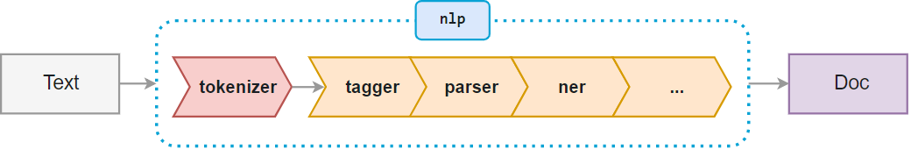

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [ ]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7e9f25948760>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7e9f24a40a00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7e9f24a31150>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7e9f24a15140>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7e9f24a16300>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7e9f24a31070>)]

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

___
## Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. We'll go into much more detail on tokenization in an upcoming lecture. For now, let's look at another example:

In [ ]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
   SPACE dep
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [ ]:
doc2

Tesla isn't   looking into startups anymore.

In [ ]:
doc2[0]

Tesla

In [ ]:
type(doc2)

spacy.tokens.doc.Doc

___
## Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [ ]:
doc2[0].pos_

'PROPN'

___
## Dependencies
We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [ ]:
doc2[0].dep_

'nsubj'

To see the full name of a tag use `spacy.explain(tag)`

In [ ]:
spacy.explain('PROPN')

'proper noun'

In [ ]:
spacy.explain('nsubj')

'nominal subject'

___
## Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [ ]:
# Lemmas (the base form of the word):
print(doc2[7].text)
print(doc2[5].lemma_)

looking
look


In [ ]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, gerund or present participle


In [ ]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [ ]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


___
## Spans
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [ ]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [ ]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [ ]:
type(life_quote)

spacy.tokens.span.Span

In upcoming lectures we'll see how to create Span objects using `Span()`. This will allow us to assign additional information to the Span.

___
## Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [ ]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [ ]:
doc4

This is the first sentence. This is another sentence. This is the last sentence.

In [ ]:
doc4[0]

This

In [ ]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [ ]:
doc4[6].is_sent_start

True

## Next up: Tokenization